In [2]:
from google.colab import drive
drive.mount('gdrive')

!cp /content/gdrive/MyDrive/Data/TRPL/functions.py ./
!cp /content/gdrive/MyDrive/Data/TRPL/04_24_23_APTMS_Fluence/04_24_23_Ref_onlyAPTMS_FluenceData.csv ./

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from functions import *
from scipy import signal
from scipy.optimize import Bounds
from scipy.optimize import differential_evolution
from scipy.optimize import dual_annealing
from scipy.optimize import curve_fit

In [4]:
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

In [6]:
names1 = ['ref 100pc10int','ref 50pc10int','ref 50pc7int','ref 50pc6int','ref 10pc7int','APTMS 100pc10int','APTMS 50pc10int', 'APTMS 50pc7int','APTMS 50pc6int','APTMS 10pct7int']
title = r'Br$_{25}$ Fluence Dependent TRPL'

# skip = 1

data = pd.read_csv('04_24_23_Ref_onlyAPTMS_FluenceData.csv', delimiter=',',index_col=False, skiprows = 1)
# data = pd.read_csv('/content/gdrive/MyDrive/Data/TRPL/3_30_23_Br25_Halfstacks/Br25_halfstacks_fluence_data_full.csv', delimiter=',',index_col=False, skiprows = 0)

altdata = data.values

In [7]:
print(data)
bumpindex = 7730
altdata[bumpindex:,1:] = data.values[bumpindex:,1:]*1.3

           Time  100pc10int  50pc10int  50pc7int  50pc6int  10pct7int  \
0         0.000           1          1         2         4         11   
1         0.512           2          0         5         7         14   
2         1.024           1          1         2         4         17   
3         1.536           0          0         3         9         13   
4         2.048           0          1         3         9         19   
...         ...         ...        ...       ...       ...        ...   
19136  9797.632           0          3         2         4         13   
19137  9798.144           1          0         2         5         10   
19138  9798.656           0          0         5         4         13   
19139  9799.168           1          2         1         4         12   
19140  9799.680           0          0         4         3         17   

       100pct10int  50pct10int  50pct7int  50pct6int  10pct7int.1  
0                0           0          4          2   

In [16]:


size = np.int32(np.size(names1))

taus = np.zeros(size)
tau1 = np.zeros(size)
tau2 = np.zeros(size)
taua = np.zeros(size)
beta = np.zeros(size)
noises = np.zeros(size)
errors = np.zeros(size)


strfits = np.zeros(np.shape(altdata))
dubfits = np.zeros(np.shape(altdata))

peaktime = np.zeros(size)


prange = np.zeros(size)

scale = 1e9
for K in range (size):
    # print("test")
    plotter = K +1

#     print(plotter)
    prange[K] = 7000
    # if (data.values[15624,plotter]<=0):
    #     prange[K] = 15624
    # elif (data.values[7812,plotter]<=0):
    #     prange[K] = 7812
    # elif (data.values[3906,plotter]<=0):
    #     prange[K] = 3906
    # else:
    #     print(plotter)
    #     print("ERROR")
    #     break
        
# print(prange)

for K in range (size):     
    plotter = K +1
#     print(np.int(prange[K]))
    peaktime[K] = np.argmax(altdata[:np.int32(prange[K]),plotter])
    normdata = (altdata[np.int32(peaktime[K]):np.int32(prange[K]),plotter])/(np.max(altdata[:np.int32(prange[K]),plotter]))
    time = altdata[np.int32(peaktime[K]):np.int32(prange[K]),0]
    for P in range(2):
      stretchfit = stretch_exp_fit(normdata, (time-time[0])*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1),noise = (0,1e-1))
    doublefit = double_exp_fit(normdata, (time-time[0])*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))

    taus[K] = stretchfit[3]*scale
    beta[K] = stretchfit[1]
    noises[K] = stretchfit[4]
    tau1[K] = doublefit[0]*scale
    tau2[K] = doublefit[2]*scale
    taua[K] = doublefit[4]*scale
    strfits[np.int32(peaktime[K]):np.int32(prange[K]),K+1] = stretchfit[5]
    dubfits[np.int32(peaktime[K]):np.int32(prange[K]),K+1] = doublefit[5]
    # errors[K] = residuals2(stretchfit[0:5])

    # print("Fitted" + f" {K+1}")
    # print("a1 + a2 for sample" + f" {K+1} =" + f" {doublefit[1]+doublefit[3]}")
    print("tau_stretch for sample" + f" {K+1} =" + f" {stretchfit[3]*scale} ns")
    # print("residuals = " +f"{errors[K]:.3e}")

    
#     plt.plot(time, data.values[peaktime:prange,plotter]/np.max(data.values[:prange,plotter]), c= 'red', lw = 0.5)
#     plt.yscale('log')
#     plt.show()

tau_stretch for sample 1 = 226.96190576826356 ns
tau_stretch for sample 2 = 531.2055755207941 ns
tau_stretch for sample 3 = 1383.1691230456813 ns
tau_stretch for sample 4 = 3363.1740471577755 ns
tau_stretch for sample 5 = 6078.220178666146 ns
tau_stretch for sample 6 = 419.57540072233905 ns
tau_stretch for sample 7 = 668.1720062757083 ns
tau_stretch for sample 8 = 1207.4712274107296 ns
tau_stretch for sample 9 = 2015.4850145502132 ns
tau_stretch for sample 10 = 4181.481815221291 ns


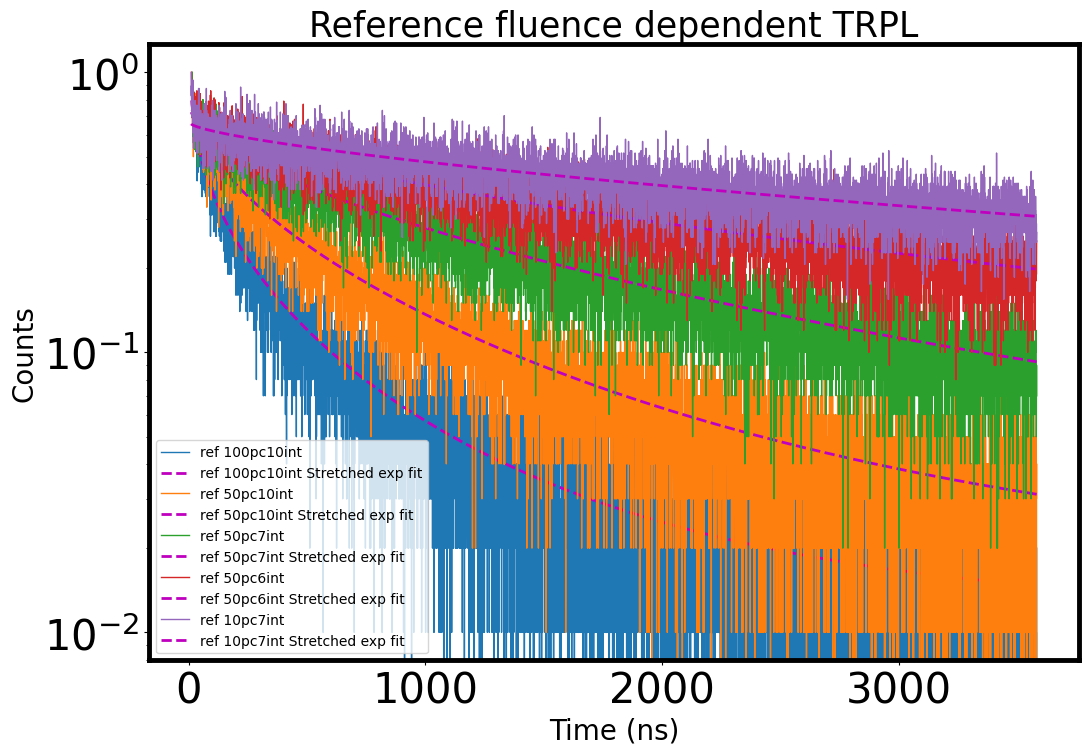

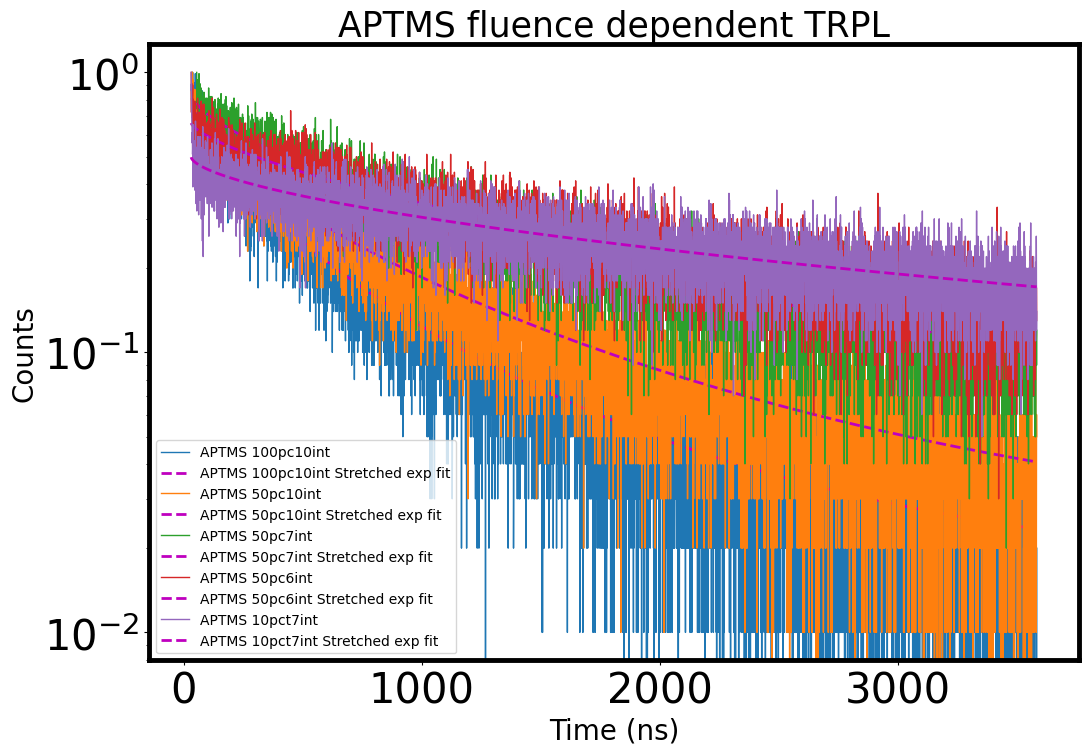

In [21]:
numgroup = 2
groups = ([0,1,2,3,4],[5,6,7,8,9])
groupnames = ('Reference','APTMS')

for n in range(numgroup):
#     print(n)
    fig = plt.figure(figsize =(12, 8))
    plt.title(groupnames[n] + ' fluence dependent TRPL',fontsize = 25)
    for K in groups[n]:
#         print(K)
        plotter = K+1
        time = altdata[np.int32(peaktime[K]):np.int32(prange[K]),0]
        plt.plot(time, altdata[np.int32(peaktime[K]):np.int32(prange[K]),plotter]/np.max(altdata[:np.int32(prange[K]),plotter]), lw = 1,label = names1[K])
        plt.plot(time, strfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm--', lw = 2, label=names1[K] + " Stretched exp fit")
        # plt.plot(time, dubfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm-', lw = 2, label=names1[K] + " Double exp fit")
        # plt.plot(time, strfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm--', lw = 2, )
        # plt.plot(time, dubfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm-', lw = 2, )    

        plt.yscale('log')
    # plt.ylim(0.01,1)
    # plt.legend(fontsize = "large",)
    plt.ylabel('Counts',fontsize = 20)
    plt.xlabel('Time (ns)',fontsize = 20)
    plt.legend(fontsize = "medium",)

    plt.show()
    print()

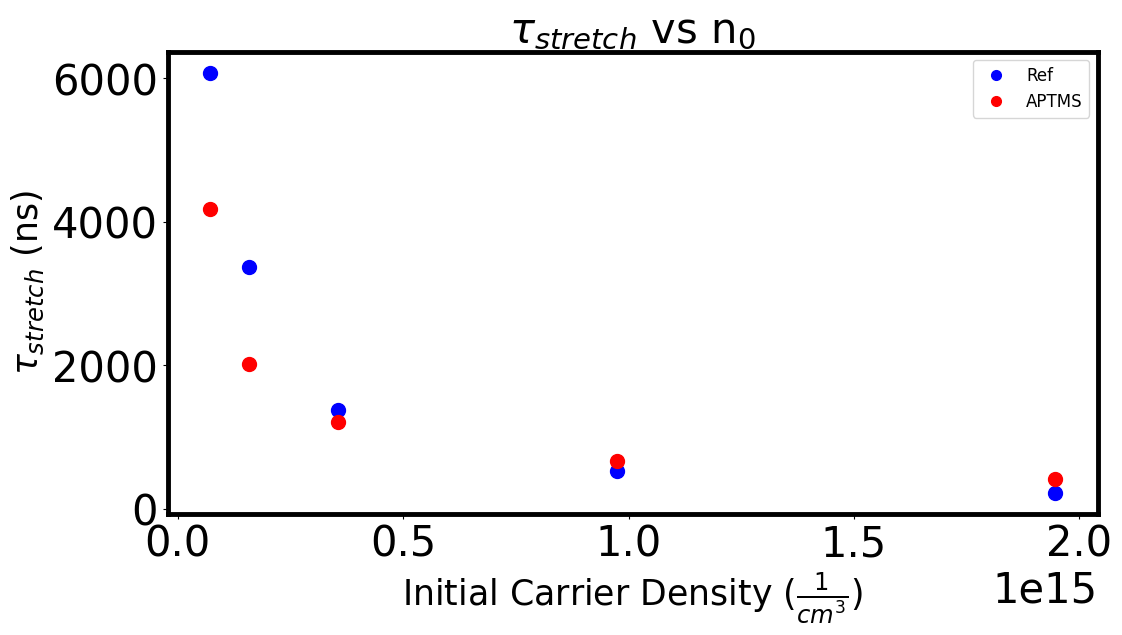

In [23]:
xsize = 15

# N0data = [2.61e17,1.35e17,4.85e16,2.26e16,1.01e16]

N0data = [1.9466e15,0.5*1.9466e15,0.5*7.1024e14,0.5*3.1659e14,0.1*7.1024e14]


fig = plt.figure(figsize =(12, 6))
plt.plot(N0data,taus[0:5],'.', label = "Ref", color = 'blue', ms = 20)
plt.plot(N0data[0:5],taus[5:10],'.', label = "APTMS", color = 'red', ms = 20)

plt.title(r"$\tau_{stretch}$ vs n$_{0}$", fontsize = 30)
plt.ylabel(r"$\tau_{stretch}$ (ns)", fontsize = 25)
plt.xlabel(r"Initial Carrier Density ($\frac{1}{cm^3}$)",fontsize = 25)
# plt.xticks(np.arange(np.size(xlabels)),xlabels, fontsize = xsize)

# plt.xlabel("Surface Passivator", fontsize = 25)
plt.legend(fontsize = "large", markerscale = 0.7)
# plt.xscale("log")
plt.show()


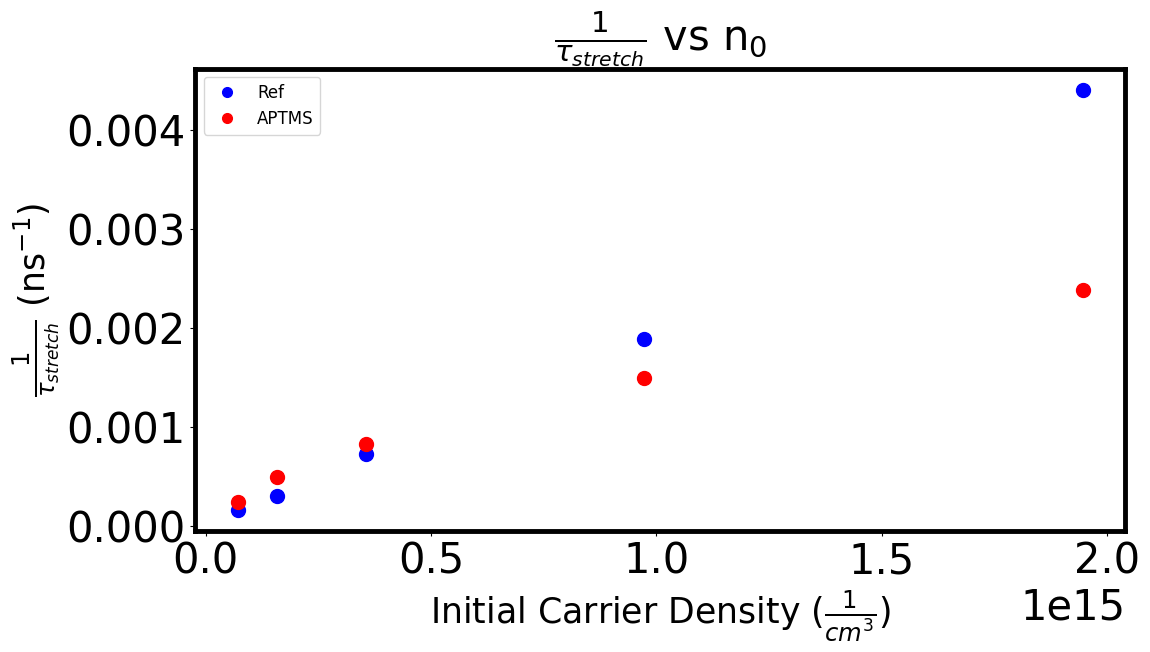

In [24]:
xsize = 15



tauinvdata = np.zeros(np.size(taus))
for P in range(np.size(taus)):
    tauinvdata[P] = 1/(taus[P])

def line(x,m,b):
    return m*x+b

pars1,cov1 = curve_fit(xdata = N0data[0:5], ydata=tauinvdata[0:5], f = line)
# print(pars1)
# print(f"x int = {-1*pars1[1]/pars1[0]:.3e}")

pars2,cov2 = curve_fit(xdata = N0data[0:4], ydata=tauinvdata[5:9], f = line)
# print(pars2)
# print(f"x int = {-1*pars2[1]/pars2[0]:.3e}")
    
xaxis = np.linspace(0,np.max(N0data),1000)
fig = plt.figure(figsize =(12, 6))

plt.plot(N0data,tauinvdata[0:5],'.', label = "Ref", color = 'blue', ms = 20)
# plt.plot(xaxis,line(xaxis,pars1[0],pars1[1]),'--', label = "Ref linear fit", color = 'cyan')
plt.plot(N0data[0:5],tauinvdata[5:10],'.', label = "APTMS", color = 'red', ms = 20)

plt.title(r"$\frac{1}{\tau_{stretch}}$ vs n$_{0}$", fontsize = 30)
plt.ylabel(r"$\frac{1}{\tau_{stretch}}$ (ns$^{-1}$)", fontsize = 25)
plt.xlabel(r"Initial Carrier Density ($\frac{1}{cm^3}$)",fontsize = 25)
# plt.xticks(np.arange(np.size(xlabels)),xlabels, fontsize = xsize)

# plt.xlabel("Surface Passivator", fontsize = 25)
plt.legend(fontsize = "large", markerscale = 0.7)
# plt.xscale("log")
plt.show()


In [25]:
def PL_HLI_fit(TRPL, t, n0, k_bounds=(0,1e-5),a_bounds = (0.1,1.5), noise_bounds=(0,1e-3)):

    
    def PL_HLI(t,k,n0,a,noise):
        fit = 1/(1+n0*k*t)
        return a*(fit/np.max(fit)) + noise


    def Diff_Ev_Fit_DE(TRPL):

        def residuals(params):
            k = params[0]
            a = params[1]
            noise = params[2]
            
            PL_sim = PL_HLI(t=t,k = k,a = a, noise =noise,n0=n0)

            Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
            return Resid #returns the difference between the PL data and simulated data

        bounds = [k_bounds, a_bounds, noise_bounds]

        result = dual_annealing(residuals, bounds,maxiter = 4000, x0 = [7e-9,0.8,1e-3])
        # result = differential_evolution(residuals, bounds,maxiter = 50000, x0 = [7e-9,0.8,1e-3])

        return result.x

    p = Diff_Ev_Fit_DE(TRPL)

    k = p[0]
    a = p[1]
    noise = p[2]

    PL_fit = PL_HLI(t=t,k = k,a = a, noise =noise,n0=n0)
    return k,a, n0, noise, PL_fit


In [34]:
testrange = 19000
newdata = altdata[0:testrange,1]/np.max(data.values[0:testrange,1])
testdata = newdata[np.argmax(newdata):]
testtime = altdata[np.argmax(newdata):testrange,0]*1e-9
testfittime = testtime - testtime[0]
highfluence_n0 = N0data[0]

# print(testdata)
# print(np.shape(testtime))


HLItestfit = PL_HLI_fit(testdata, testfittime, k_bounds=(1e-13,5e-7),n0 = highfluence_n0, noise_bounds = (0,1e-2))

def PL_HLI(t,k,n0,a,noise):
    fit = 1/(1+n0*k*t)
    return a*(fit/np.max(fit)) + noise

def residuals2(t,k,n0,a,noise, TRPL):
            
    PL_sim = PL_HLI(t=t,k = k,a = a, noise =noise,n0=n0)

    Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
    return Resid

print(f'Residuals = {residuals2(t = testfittime,k = HLItestfit[0],n0= HLItestfit[2],a= HLItestfit[1],noise= HLItestfit[3], TRPL = testdata):.4f}')

print(f"k_eff = {HLItestfit[0]:.3e}, a = {HLItestfit[1]:.3f}, noise = {HLItestfit[-2]:.3e}")
# print()




Residuals = 175.8090
k_eff = 6.900e-09, a = 0.809, noise = 4.929e-05


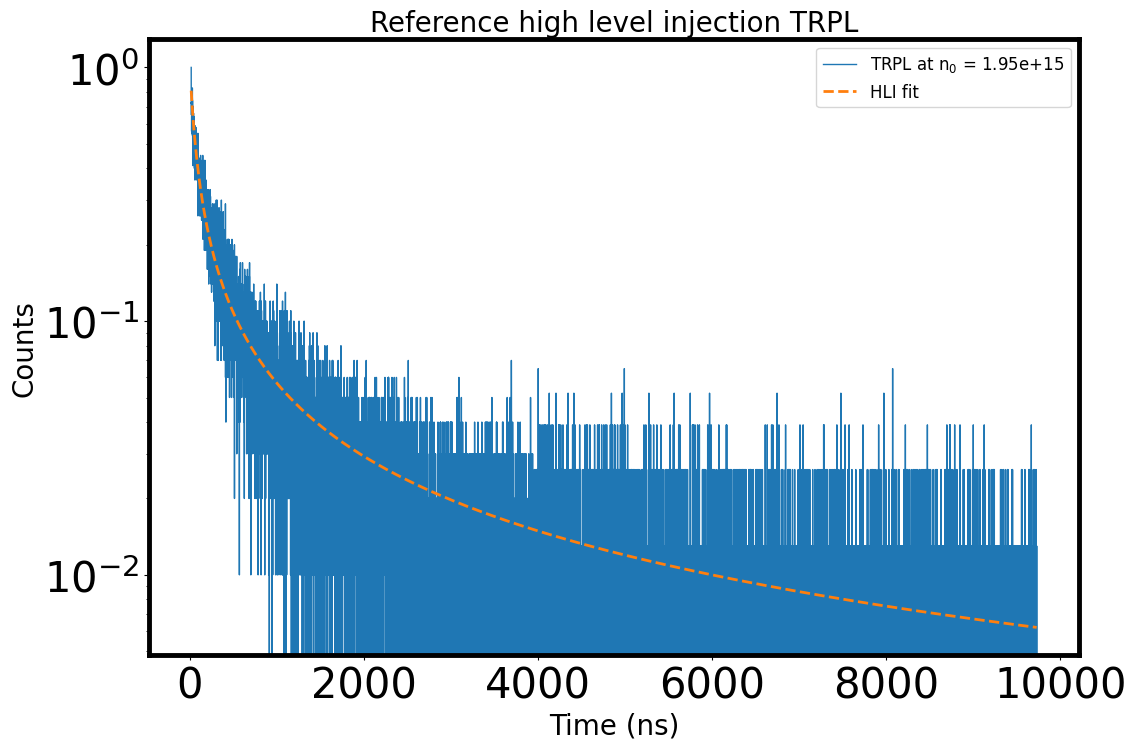

In [35]:
fig = plt.figure(figsize =(12, 8))

plt.plot(testtime[0:]*1e9,testdata[0:],'-',lw = 1,label = r'TRPL at n$_0$ = ' +f'{highfluence_n0:.2e}')
plt.plot(testtime[0:]*1e9,HLItestfit[-1][0:],"--",label = 'HLI fit',lw = 2)
plt.title('Reference high level injection TRPL',fontsize = 20)
plt.ylabel('Counts',fontsize = 20)
plt.xlabel('Time (ns)',fontsize = 20)
plt.legend(fontsize = 'large')
plt.yscale('log')
plt.show()

In [36]:
def PL_LLI_fit(TRPL, t, k=1e-6, p0_bounds=(1e8,1e18), noise_bounds=(0,1e-3),a_bounds = (0.2,1.5),n0=(1e17),maxiter = 1000, x0 = [4e13,1e-3,0.65]):

#     def single_exp(t, k1, a):
#         return (np.exp(-(k1*t)))

#     def bimol_exp(t, k1, k2, a):
#         return (k2/(k1-single_exp(t,k1)))
    
    def PL_LLI(t,k,p0,a,noise):
        # print(f'k ={k:.3e},p0 = {p0:.3e},n0 = {n0:.3e},pr = {pr:.3e},noise ={noise:.3e}')
        fit = np.exp(-t*k*p0)
        # print(fit)
        return (a*fit/np.max(fit))+noise


    def Diff_Ev_Fit_DE(TRPL):
        bounds = [p0_bounds, noise_bounds, a_bounds]

        def residuals(params):#params are the parameters to be adjusted by differential evolution or leastsq, interp is the data to compare to the model.
            #Variable Rates
            p0 = params[0]
            noise = params[1]
            a = params[2]
            
            # print(f"{k:.3e},{p0:.3e},{noise:.3e}")
            # print(params)

            PL_sim = PL_LLI(t,k, p0,a, noise)

            Resid= (np.sum((((PL_sim)-TRPL)**2)/(np.sqrt((PL_sim)**2))))
            # Resid= (np.sum((((np.log(PL_sim))-np.log(TRPL))**2)/(np.sqrt((np.log(PL_sim))**2))))

            # print((((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2))[2])
            # print(PL_sim)
            return Resid #returns the difference between the PL data and simulated data


        # result = dual_annealing(residuals, bounds, maxiter = maxiter,x0 = x0) #Annealing Doesnt give good results for the LLI fit
        result = differential_evolution(residuals, bounds, maxiter = maxiter, x0 = x0)
        return result.x

    p = Diff_Ev_Fit_DE(TRPL)

    p0 = p[0]
    noise = p[1]
    a = p[2]

    
    PL_fit = PL_LLI(t=t,k=k,p0=p0,a=a,noise=noise)


    return k, p0,a, noise, PL_fit


In [37]:
testrange = 19000
newdata = altdata[0:testrange,5]/np.max(altdata[0:testrange,5])
testdata = newdata[np.argmax(newdata):]
testtime = altdata[np.argmax(newdata):testrange,0]*1e-9
testfittime = testtime - testtime[0]
lowfluence_n0 = N0data[-1]
HLI_K = HLItestfit[0]


# print(testdata)
# print(np.shape(testtime))


LLItestfit = PL_LLI_fit(testdata, testfittime, k=HLI_K, p0_bounds=(1e8,1e18),a_bounds = (0.1,1), noise_bounds=(1e-6,1),maxiter = 5000, x0 = [11e13,1e-3,0.4])

def PL_LLI(t,k,p0,a,noise):
    fit = np.exp(-t*k*p0)
    return (a*fit/np.max(fit))+noise

def residuals2(t,k,p0,a,noise, TRPL):
            
    PL_sim = PL_LLI(t=t,k = k,p0=p0,a = a, noise =noise)

    Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
    return Resid

print(f"residuals = {residuals2(t = testfittime,k = LLItestfit[0],p0= LLItestfit[1],a= LLItestfit[2],noise= LLItestfit[3], TRPL = testdata):.3f}")

print(f"k_eff = {LLItestfit[0]:.3e}, p0 ={LLItestfit[1]:.3e},a = {LLItestfit[2]:.3f},noise = {LLItestfit[3]:.3e}")



residuals = 223.495
k_eff = 6.900e-09, p0 =4.110e+13,a = 0.474,noise = 1.293e-01


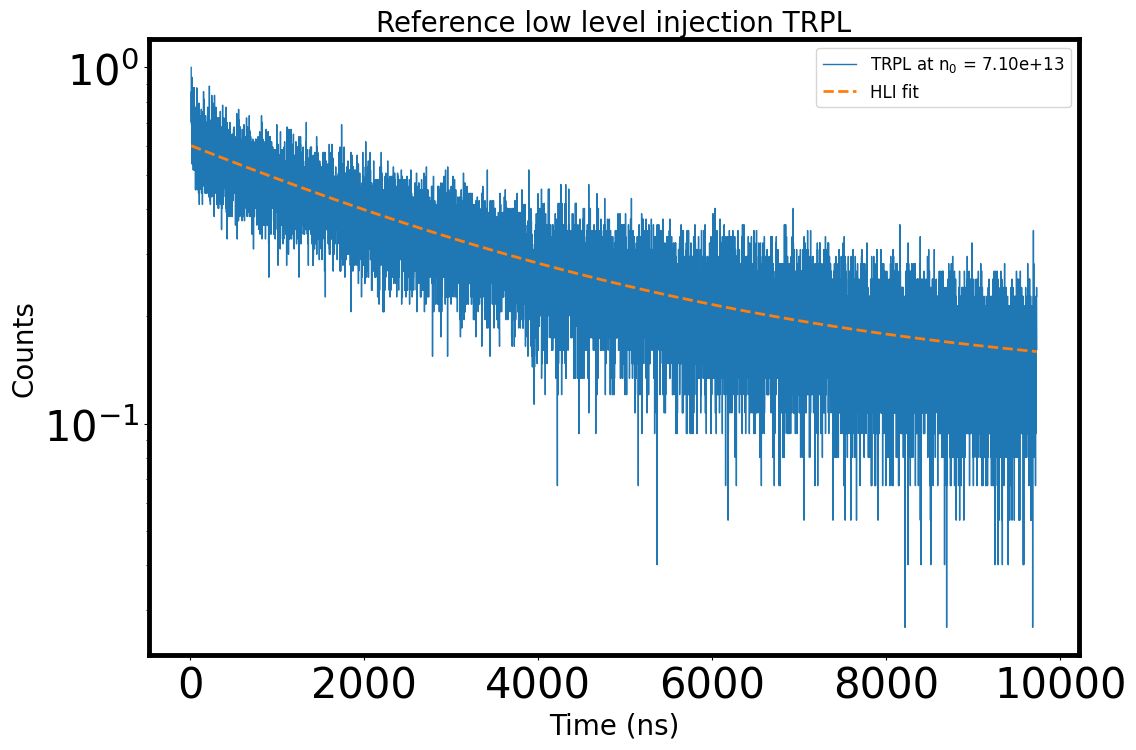

In [40]:
fig = plt.figure(figsize =(12, 8))

plt.plot(testtime[0:]*1e9,testdata[0:],'-',lw = 1,label = r'TRPL at n$_0$ = ' +f'{lowfluence_n0:.2e}')
plt.plot(testtime[0:]*1e9,LLItestfit[-1][0:],"--",label = 'HLI fit',lw = 2)
plt.title('Reference low level injection TRPL',fontsize = 20)
plt.ylabel('Counts',fontsize = 20)
plt.xlabel('Time (ns)',fontsize = 20)
plt.legend(fontsize = 'large')
plt.yscale('log')
plt.show()

In [42]:
testrange = 19000
newdata = altdata[0:testrange,-5]/np.max(data.values[0:testrange,-5])
testdata = newdata[np.argmax(newdata):]
testtime = altdata[np.argmax(newdata):testrange,0]*1e-9
testfittime = testtime - testtime[0]
highfluence_n0 = N0data[0]

# print(testdata)
# print(np.shape(testtime))


HLItestfit = PL_HLI_fit(testdata, testfittime, k_bounds=(1e-13,5e-7),a_bounds = (0.5,1),n0 = highfluence_n0, noise_bounds = (0,1e-2))

def PL_HLI(t,k,n0,a,noise):
    fit = 1/(1+n0*k*t)
    return a*(fit/np.max(fit)) + noise

def residuals2(t,k,n0,a,noise, TRPL):
            
    PL_sim = PL_HLI(t=t,k = k,a = a, noise =noise,n0=n0)

    Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
    return Resid

print(f'Residuals = {residuals2(t = testfittime,k = HLItestfit[0],n0= HLItestfit[2],a= HLItestfit[1],noise= HLItestfit[3], TRPL = testdata):.4f}')

print(f"k_eff = {HLItestfit[0]:.3e},a = {HLItestfit[1]:.3f}, noise = {HLItestfit[-2]:.3e}")



Residuals = 227.9012
k_eff = 4.468e-09,a = 0.982, noise = 7.045e-05


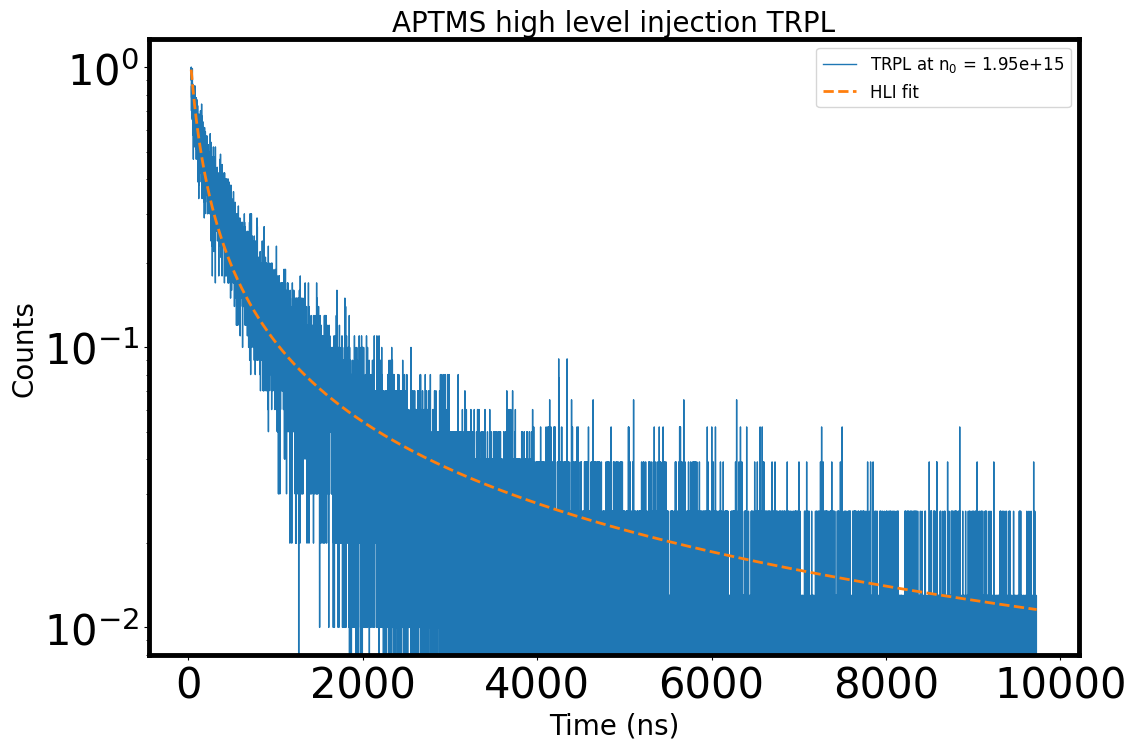

In [43]:
fig = plt.figure(figsize =(12, 8))

plt.plot(testtime[0:]*1e9,testdata[0:],'-',lw = 1,label = r'TRPL at n$_0$ = ' +f'{highfluence_n0:.2e}')
plt.plot(testtime[0:]*1e9,HLItestfit[-1][0:],"--",label = 'HLI fit',lw = 2)
plt.title('APTMS high level injection TRPL',fontsize = 20)
plt.ylabel('Counts',fontsize = 20)
plt.xlabel('Time (ns)',fontsize = 20)
plt.legend(fontsize = 'large')
plt.yscale('log')
plt.show()

In [47]:
testrange = 19000
newdata = altdata[0:testrange,-1]/np.max(altdata[0:testrange,-1])
testdata = newdata[np.argmax(newdata):]
testtime = altdata[np.argmax(newdata):testrange,0]*1e-9
testfittime = testtime - testtime[0]
# lowfluence_n0 = N0data[-1]
HLI_K = HLItestfit[0]


# print(testdata)
# print(np.shape(testtime))


LLItestfit = PL_LLI_fit(testdata, testfittime, k=HLI_K, p0_bounds=(1e8,1e18),a_bounds = (0.1,1), noise_bounds=(1e-6,1),maxiter = 5000, x0 = [11e13,1e-3,0.4])

def PL_LLI(t,k,p0,a,noise):
    fit = np.exp(-t*k*p0)
    return (a*fit/np.max(fit))+noise

def residuals2(t,k,p0,a,noise, TRPL):
            
    PL_sim = PL_LLI(t=t,k = k,p0=p0,a = a, noise =noise)

    Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
    return Resid

print(f"residuals = {residuals2(t = testfittime,k = LLItestfit[0],p0= LLItestfit[1],a= LLItestfit[2],noise= LLItestfit[3], TRPL = testdata):.3f}")

print(f"k_eff = {LLItestfit[0]:.3e}, p0 ={LLItestfit[1]:.3e},a = {LLItestfit[2]:.3f},noise = {LLItestfit[3]:.3e}")

residuals = 223.268
k_eff = 4.468e-09, p0 =7.821e+13,a = 0.343,noise = 6.918e-02


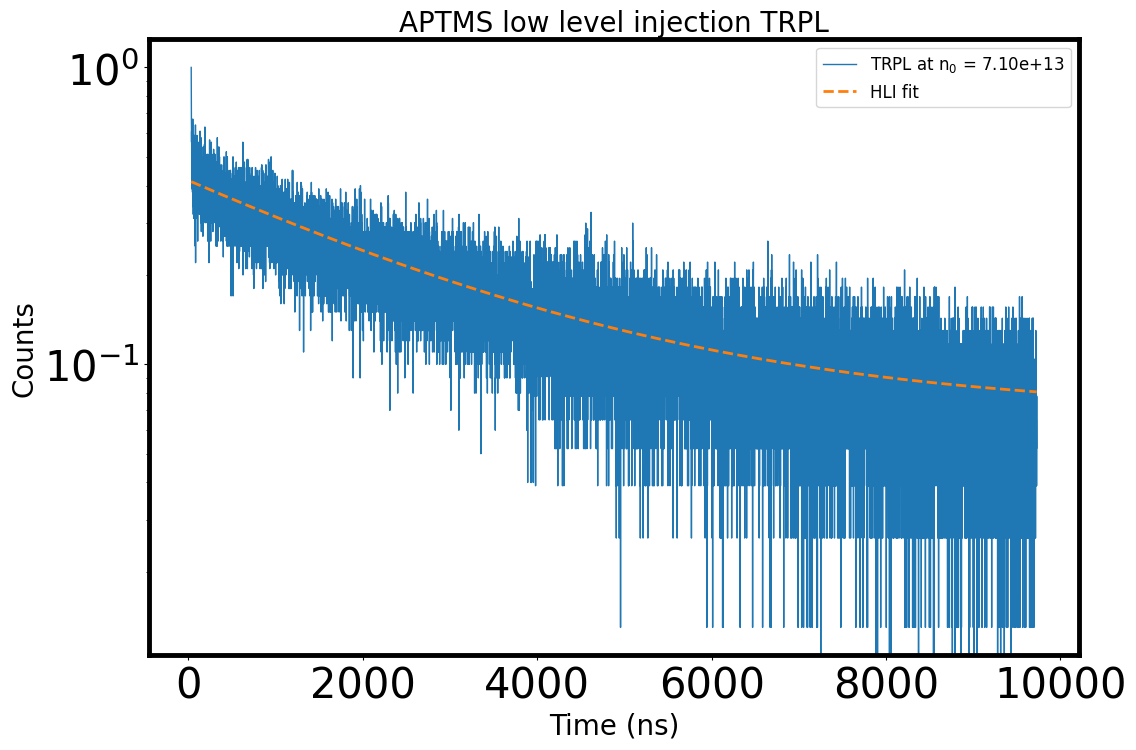

In [48]:
fig = plt.figure(figsize =(12, 8))

plt.plot(testtime[0:]*1e9,testdata[0:],'-',lw = 1,label = r'TRPL at n$_0$ = ' +f'{lowfluence_n0:.2e}')
plt.plot(testtime[0:]*1e9,LLItestfit[-1][0:],"--",label = 'HLI fit',lw = 2)
plt.title('APTMS low level injection TRPL',fontsize = 20)
plt.ylabel('Counts',fontsize = 20)
plt.xlabel('Time (ns)',fontsize = 20)
plt.legend(fontsize = 'large')
plt.yscale('log')
plt.show()